In [1]:
library(tidyverse)
library(glatos)
library(plotly)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

version 0.4.0 ('full-english-breakfast')


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
wal_det_file <- system.file("extdata", "walleye_detections.csv", package = "glatos")
walleye_detections <- read_glatos_detections(wal_det_file)

rec_file <- system.file("extdata", "sample_receivers.csv",  package = "glatos")
rcv <- read_glatos_receivers(rec_file)

# find and remove false detections
filtered_detections <-
  walleye_detections %>% 
  false_detections(tf = 3600) %>% 
  filter(passed_filter != FALSE)

# Now we can convert the GLATOS filtered data into a ATT object to be used in VTrack


The filter identified 93 (1.3%) of 7180 detections as potentially false.



In [3]:
ATTdata <- glatos::convert_glatos_to_att(walleye_detections, rcv)

attr(ATTdata, "CRS") <- sp::CRS("+init=epsg:4326")

head(ATTdata)

[1] "http://www.marinespecies.org/rest/AphiaRecordsByVernacular/walleye"


Date.Time,Transmitter,Station.Name,Receiver,Latitude,Longitude,Sensor.Value,Sensor.Unit
<dttm>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>
2012-04-29 01:48:37,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 01:52:55,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 01:55:12,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 01:56:42,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 01:58:37,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 02:01:22,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 02:03:47,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 02:05:33,A69-9001-32054,TTB-002,VR2W-113213,43.39165,-83.99264,NA,NA
2012-04-29 02:08:00,A69-9001-32054,TTB-001,VR2W-119331,43.38709,-83.98737,NA,NA


In [4]:
# devtools::install_github("rossdwyer/VTrack")

library(VTrack)

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Registered S3 methods overwritten by 'adehabitatMA':
  method                       from
  print.SpatialPixelsDataFrame sp  
  print.SpatialPixels          sp  

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 



In [5]:
aba <- abacusPlot(ATTdata, det.col = "red")

# Abacus plot by station
aba_facet <- abacusPlot(ATTdata, det.col = "red", facet = T)

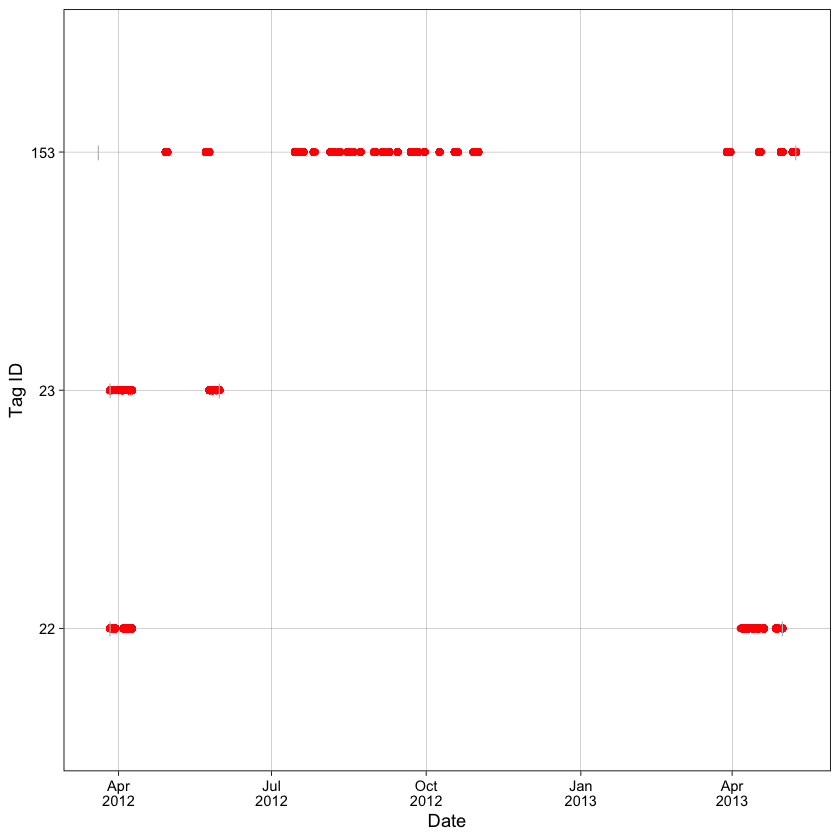

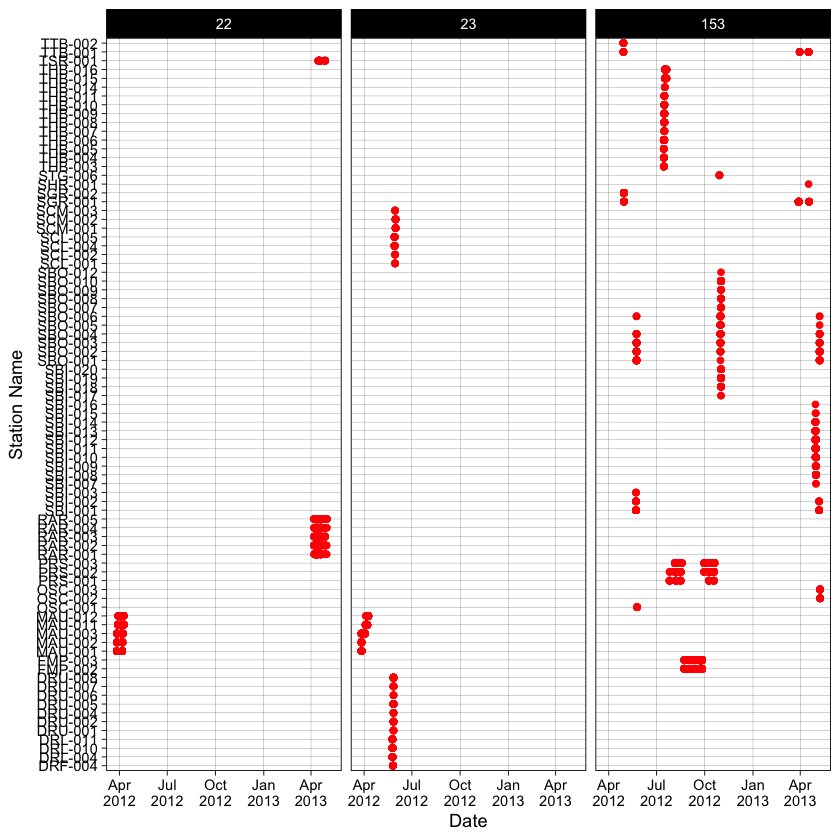

In [6]:
aba
aba_facet

In [7]:
library(lubridate)


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




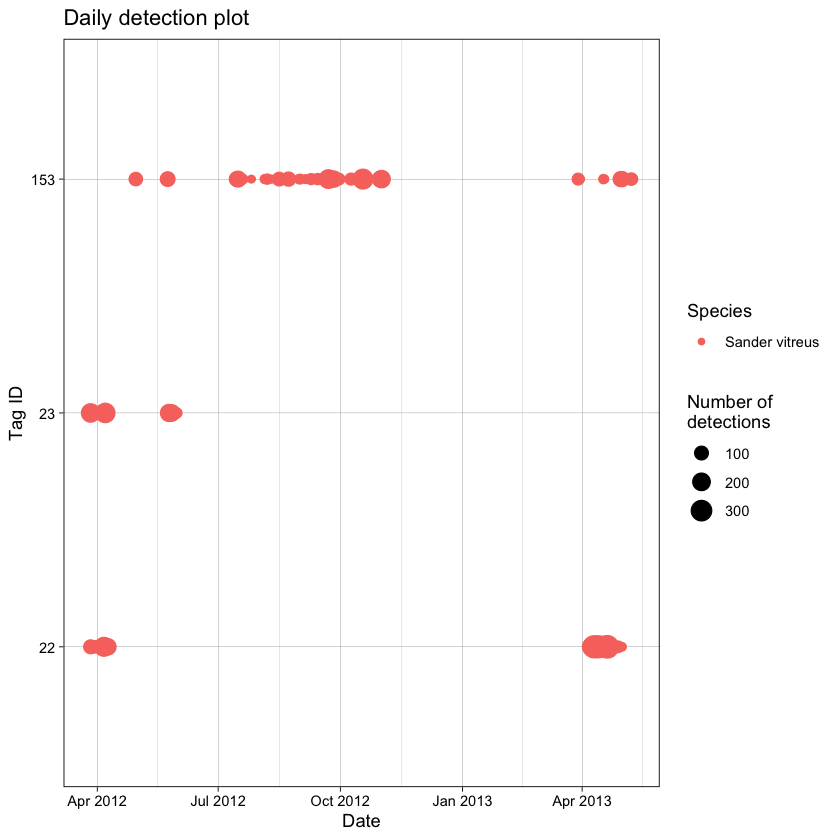

In [8]:
abacus_data <- 
  ATTdata$Tag.Detections %>% 
  left_join(ATTdata$Tag.Metadata,  by = "Transmitter") %>% 
  mutate(date = date(Date.Time)) %>% 
  group_by(Tag.ID, date, Sci.Name) %>% 
  summarise(Num.Det = n())

abacus_data %>% 
  ggplot(aes(x = date, y = factor(Tag.ID), size = Num.Det, color = Sci.Name)) +
  geom_point() +
  theme_linedraw() +
  labs(title = "Daily detection plot", x = "Date", y = "Tag ID", color = "Species", size = "Number of\ndetections")

In [9]:
detSum <- detectionSummary(ATTdata, sub = "%Y-%W")

detSum

# Overall metrics
detSum$Overall

# Weeky metrics
detSum$Subsetted

$Overall
# A tibble: 3 x 10
  Tag.ID Transmitter Sci.Name Sex   Bio   Number.of.Detec… Number.of.Stati…
   <int> <fct>       <fct>    <fct> <fct>            <int>            <int>
1     22 A69-9002-1… Sander … FEMA… NA                2807               11
2     23 A69-9002-1… Sander … FEMA… NA                1327               23
3    153 A69-9001-3… Sander … FEMA… NA                2949               54
# … with 3 more variables: Days.Detected <int>, Days.at.Liberty <dbl>,
#   Detection.Index <dbl>

$Subsetted
# A tibble: 35 x 12
   Tag.ID subset Transmitter Sci.Name Sex   Bio   Number.of.Detec…
    <int> <fct>  <fct>       <fct>    <fct> <fct>            <int>
 1     22 2012-… A69-9002-1… Sander … FEMA… NA                 205
 2     22 2012-… A69-9002-1… Sander … FEMA… NA                 453
 3     22 2012-… A69-9002-1… Sander … FEMA… NA                 163
 4     22 2013-… A69-9002-1… Sander … FEMA… NA                  30
 5     22 2013-… A69-9002-1… Sander … FEMA… NA                1095
 6     22 2013-… A69-9002-1… Sander … FEMA… NA                 762
 7     22 2013-… A69-9002-1… Sander … FEMA… NA                  79
 8     22 2013-… A69-9002-1… Sander … FEMA… NA                  20
 9     23 2012-… A69-9002-1… Sander … FEMA… NA                 272
10     23 2012-… A69-9002-1… Sander … FEMA… NA                 501
# … with 25 more rows, and 5 more variables: Number.of.Stations <int>,
#   Days.Detected <int>, New.Stations <int>, Days.at.Liberty <dbl>,
#   Detection.Index <dbl>

Tag.ID,Transmitter,Sci.Name,Sex,Bio,Number.of.Detections,Number.of.Stations,Days.Detected,Days.at.Liberty,Detection.Index
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
22,A69-9002-16173,Sander vitreus,FEMALE,NA,2807,11,24,400,0.0600000
23,A69-9002-16190,Sander vitreus,FEMALE,NA,1327,23,17,65,0.2615385
153,A69-9001-32054,Sander vitreus,FEMALE,NA,2949,54,45,415,0.1084337


Tag.ID,subset,Transmitter,Sci.Name,Sex,Bio,Number.of.Detections,Number.of.Stations,Days.Detected,New.Stations,Days.at.Liberty,Detection.Index
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
22,2012-13,A69-9002-16173,Sander vitreus,FEMALE,NA,205,5,3,NA,7,0.4285714
22,2012-14,A69-9002-16173,Sander vitreus,FEMALE,NA,453,5,4,0,7,0.5714286
22,2012-15,A69-9002-16173,Sander vitreus,FEMALE,NA,163,2,1,0,7,0.1428571
22,2013-13,A69-9002-16173,Sander vitreus,FEMALE,NA,30,5,2,5,7,0.2857143
22,2013-14,A69-9002-16173,Sander vitreus,FEMALE,NA,1095,6,6,1,7,0.8571429
22,2013-15,A69-9002-16173,Sander vitreus,FEMALE,NA,762,6,5,0,7,0.7142857
22,2013-16,A69-9002-16173,Sander vitreus,FEMALE,NA,79,6,2,0,7,0.2857143
22,2013-17,A69-9002-16173,Sander vitreus,FEMALE,NA,20,4,1,0,7,0.1428571
23,2012-13,A69-9002-16190,Sander vitreus,FEMALE,NA,272,3,5,NA,7,0.7142857


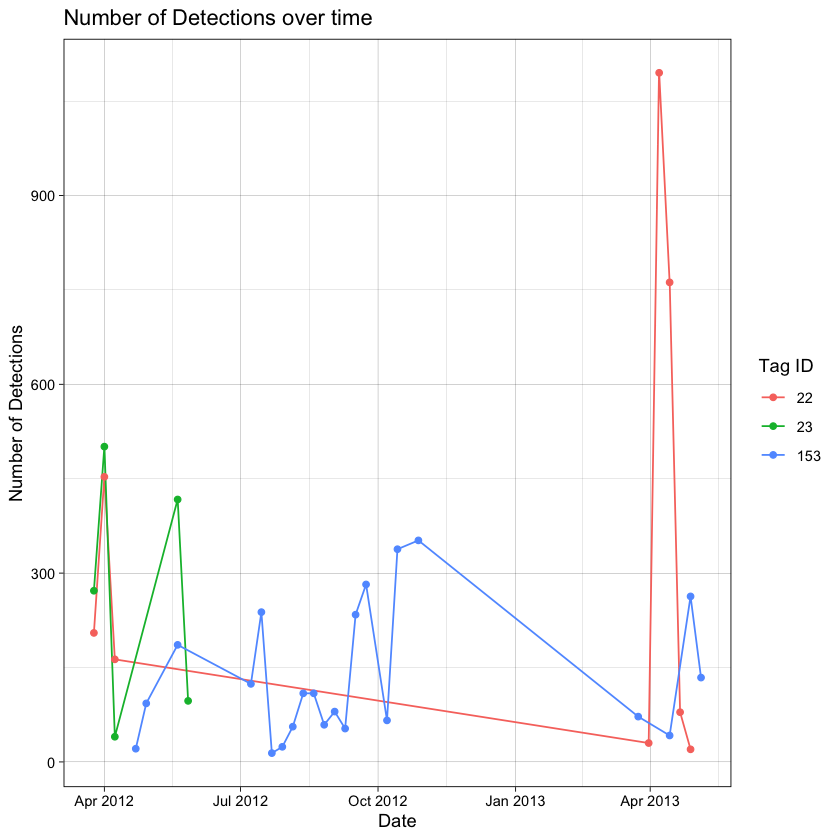

In [10]:
detSum$Subset %>% 
  mutate(Date = as.Date(paste(subset, "01", sep = "-"), "%Y-%W-%w")) %>% 
  ggplot(aes(x = Date, y = Number.of.Detections, colour = factor(Tag.ID))) +
  geom_line() + geom_point() +
  labs(title = "Number of Detections over time", x = "Date", y = "Number of Detections", colour = "Tag ID") +
  theme_linedraw()

Date.Time,Transmitter,Station.Name,Receiver,Latitude,Longitude,Sensor.Value,Sensor.Unit,Tag.ID,Common.Name,⋯,Release.Date,Sex,Tag.Life,Tag.Status,Bio,Release.Dispersal,Release.Bearing,Consecutive.Dispersal,Consecutive.Bearing,Time.Since.Last.Detection
<dttm>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>,<int>,<fct>,⋯,<date>,<fct>,<int>,<fct>,<fct>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
2012-03-27 13:05:27,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,11,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,NA,NA,NA
2012-03-27 13:16:29,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,11,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,0,NA,662
2012-03-27 13:20:49,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,11,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,0,NA,260
2012-03-27 13:25:29,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,11,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,0,NA,280
2012-03-27 13:28:07,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,11,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,0,NA,158
2012-03-27 13:41:56,A69-9002-16173,MAU-001,VR2W-112973,41.57098,-83.61776,16,ADC,22,walleye,⋯,2012-03-27,FEMALE,NA,NA,NA,NA,NA,0,NA,829


Warning message:
“Removed 3 rows containing non-finite values (stat_density).”


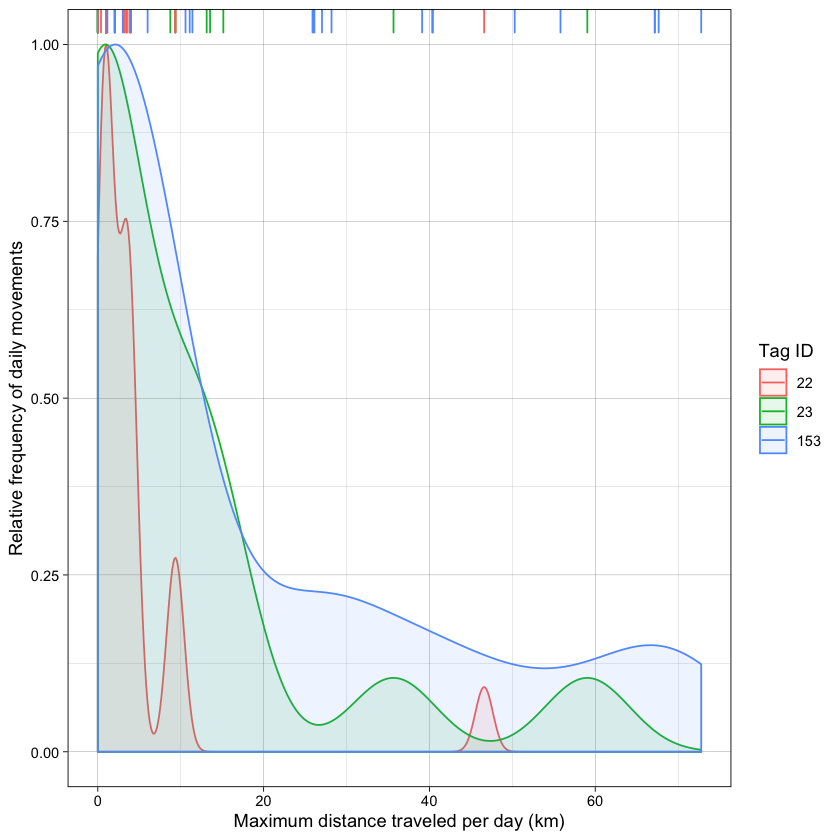

In [11]:
dispSum <- dispersalSummary(ATTdata)

head(dispSum)

dispSum %>%
  mutate(Date = date(Date.Time),
         Tag.ID = factor(Tag.ID)) %>% 
  group_by(Date, Tag.ID) %>% 
  summarise(Max.Disp.km = max(Consecutive.Dispersal)) %>%
  ggplot(aes(x = Max.Disp.km, y=..scaled..,  fill = Tag.ID, color = Tag.ID)) +
  geom_density(alpha=0.1) +
  geom_rug(sides = "t", aes(y = Max.Disp.km, color = Tag.ID)) +
  ylim(0,1) +
  labs(x = "Maximum distance traveled per day (km)",
       y = "Relative frequency of daily movements",
       fill = "Tag ID", color = "Tag ID") +
  theme_linedraw()

In [12]:
# First lets quickly map our receiver array
library(sf)
library(maptools)
library(mapview)

base <-
  ATTdata$Station.Information %>% 
  st_as_sf(coords=c("Station.Longitude", "Station.Latitude"), crs = 4326) %>% 
  mapview(alpha.regions = 0, color = "grey", cex = 3, legend = F, homebutton = F, layer.name = "Receiver Stations")


## Now lets use the COA() function to calculate hourly centers of activity
COAdata <- 
    COA(ATTdata, 
        timestep = 60) ## timestep used to estimate centers of activity (in minutes)




## Now lets add our centers of activity for each individual on the map
COAmap <- 
  base + 
  COAdata %>% 
  st_as_sf(coords = c("Longitude.coa", "Latitude.coa"), crs = 4326) %>% 
  mapview(zcol = "Tag.ID", burst = T, alpha = 0, cex = 3, legend = F)

COAmap

Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0

Loading required package: sp

Checking rgeos availability: TRUE



Run the mapshot line then open `COAmap.html` from the Jupyter file browser

In [13]:
mapshot(COAmap, url="COAmap.html")

In [16]:
library(sp)
# here epsg:3174 refers to the NAD83/Great Lakes Albers projection
# https://epsg.io/3174-1725 

proj<-CRS("+init=epsg:3174")

  |===============================================                       |  67%

Warning message in Polygon(as.matrix(xy.bord)):
“less than 4 coordinates in polygon”


  |======================================================================| 100%


$Overall
# A tibble: 3 x 10
  Tag.ID Sci.Name Common.Name Tag.Project Release.Date Tag.Life Sex   Bio  
  <chr>  <fct>    <fct>       <fct>       <date>          <int> <fct> <fct>
1 22     Sander … walleye     HECWL       2012-03-27         NA FEMA… NA   
2 23     Sander … walleye     HECWL       2012-03-27         NA FEMA… NA   
3 153    Sander … walleye     HECWL       2012-03-20         NA FEMA… NA   
# … with 2 more variables: Number.of.Detections <int>, MCP.100 <dbl>

$Subsetted
# A tibble: 35 x 11
   Tag.ID subset Sci.Name Common.Name Tag.Project Release.Date Tag.Life Sex  
   <chr>  <chr>  <fct>    <fct>       <fct>       <date>          <int> <fct>
 1 22     2012-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 2 22     2012-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 3 22     2012-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 4 22     2013-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 5 22     2013-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 6 22     2013-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 7 22     2013-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 8 22     2013-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
 9 23     2012-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
10 23     2012-… Sander … walleye     HECWL       2012-03-27         NA FEMA…
# … with 25 more rows, and 3 more variables: Bio <fct>,
#   Number.of.Detections <int>, MCP.100 <dbl>

Warning message:
“Removed 2 rows containing missing values (geom_path).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


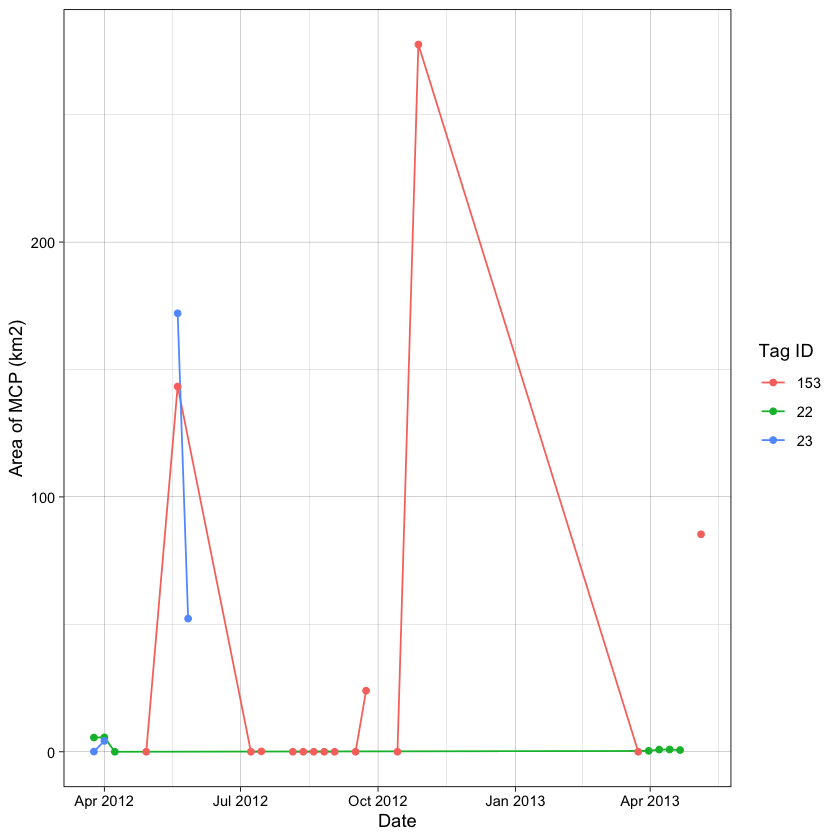

In [17]:
mcp_est <- HRSummary(COAdata,
                     projCRS = proj,
                     type = "MCP",
                     cont = 100,
                     sub = "%Y-%W")

head(mcp_est)

## Lets have a look at how 100% MCP area changes over the tagging period
mcp_est$Subset %>% 
  mutate(Date = as.Date(paste(subset, "01", sep = "-"), "%Y-%W-%w")) %>% 
  ggplot(aes(x = Date, y = MCP.100/1e6, colour = factor(Tag.ID))) +
  geom_line() + geom_point() +
  labs(x = "Date", y = "Area of MCP (km2)", colour = "Tag ID") +
  theme_linedraw()

In [18]:
BBkud_est <- HRSummary(COAdata,
                     projCRS = proj,
                     h = 200,
                     type = "BBKUD",
                     cont = c(20,50,95),
                     storepoly = TRUE,
                     sub = "%Y-%W")
                     
summary(BBkud_est)

# Overall Brownian bridge UD estimates for full tagging period
head(BBkud_est$Overall)

# Weekly Brownian bridge UD estimates for the three tagged walleye
head(BBkud_est$Subsetted)



  |======================================================================| 100%


                Length Class  Mode
Overall         12     tbl_df list
Subsetted       13     tbl_df list
Spatial.Objects  3     -none- list

Tag.ID,Sci.Name,Common.Name,Tag.Project,Release.Date,Tag.Life,Sex,Bio,Number.of.Detections,BBKUD.20,BBKUD.50,BBKUD.95
<chr>,<fct>,<fct>,<fct>,<date>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
22,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,2807,46033059,263804837,977612331
23,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,1327,0,41004533,314989364
153,Sander vitreus,walleye,HECWL,2012-03-20,NA,FEMALE,NA,2949,50647755,545870249,2251011336


Tag.ID,subset,Sci.Name,Common.Name,Tag.Project,Release.Date,Tag.Life,Sex,Bio,Number.of.Detections,BBKUD.20,BBKUD.50,BBKUD.95
<chr>,<chr>,<fct>,<fct>,<fct>,<date>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
22,2012-13,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,205,0,1475418.6,7082009.0
22,2012-14,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,453,0,295083.7,4721339.4
22,2012-15,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,163,0,0.0,885251.1
22,2013-13,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,30,0,0.0,1180334.8
22,2013-14,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,1095,0,295083.7,885251.1
22,2013-15,Sander vitreus,walleye,HECWL,2012-03-27,NA,FEMALE,NA,762,0,295083.7,2655753.4


In [19]:
fullstack <-
  unlist(BBkud_est$Spatial.Objects)[grep("*_full", names(unlist(BBkud_est$Spatial.Objects)))]

names(fullstack) <-
  unlist(lapply(strsplit(names(fullstack), "[.]"), `[[`, 1))

In [26]:
library(raster)

## Lets plot the overall BBKUD for Tag.ID `153`
fulltag <- fullstack$`153`
values(fulltag)[values(fulltag) > 95] <- NA

## Raster plot
# plot(fulltag, zlim = c(0, 100))

## Mapview plot
base + 
  mapview(fulltag)

In [21]:
library(leaflet)

## Full KUD for all tagged animals
fullmap <- COAmap@map

for (i in 1:length(fullstack)) {
  tempras<-disaggregate(fullstack[[i]], fact=3, method='bilinear')
  values(tempras)[values(tempras) >95] <-NA
  fullmap <- 
    fullmap %>% 
    addRasterImage(tempras, opacity = 0.7, group = names(fullstack)[i])
}

fullmap <- 
  fullmap %>%
  addLayersControl(
    baseGroups = names(fullstack),
    overlayGroups = "Receiver Stations",
    options = layersControlOptions(collapsed = FALSE)
  )



HTML widgets cannot be represented in plain text (need html)
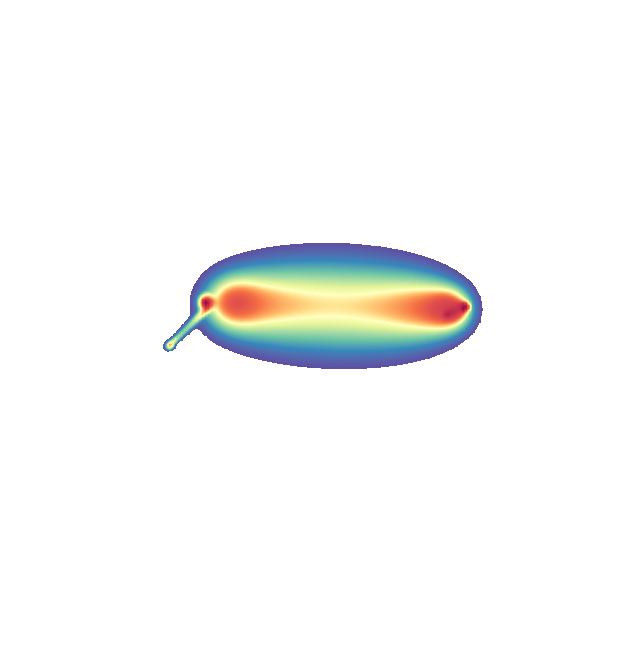
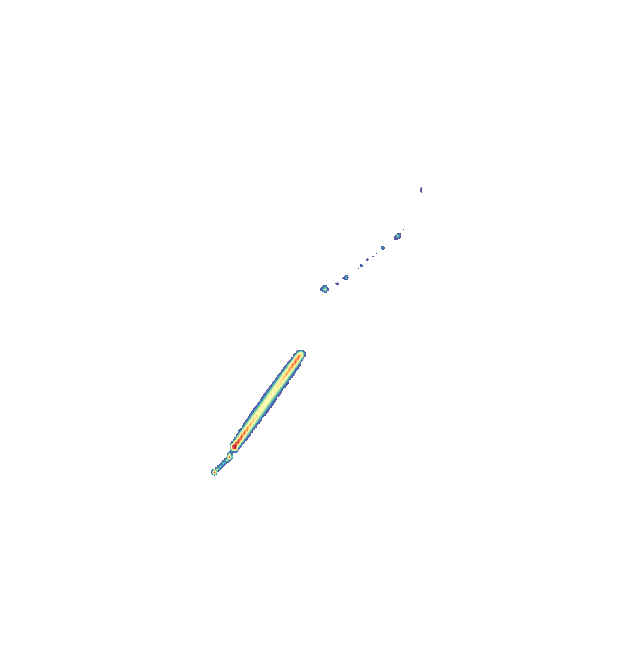
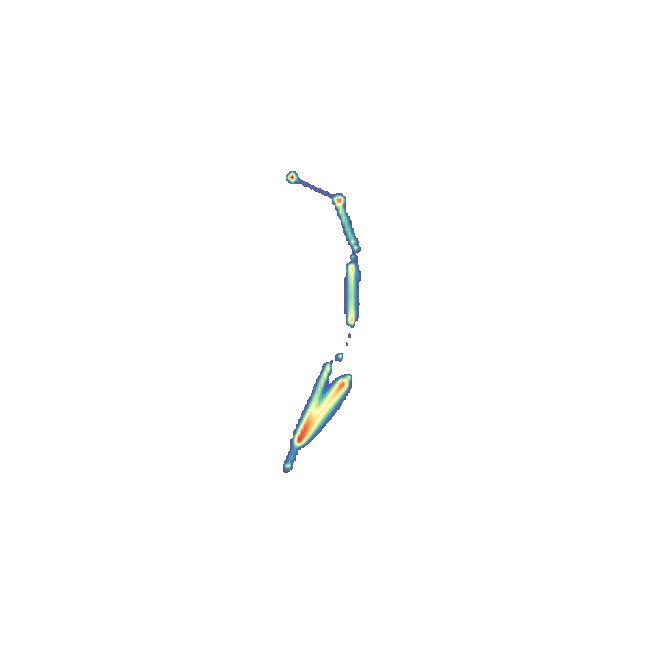

In [23]:
fullmap